In [1]:
#Import functions------------------------------------------------------------------------------------------------------
from my_functions import*
#Open Zmumu file
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") 
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

#Set event range
nmin1=0
nmax1=3000

#Choose quality 0
Zmumu_pt=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin1:nmax1]
Zmumu_eta=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin1:nmax1]
Zmumu_phi=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin1:nmax1]
#Select the Z peak pairs
Zmumu_pt, Zmumu_eta, Zmumu_phi= get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

#Open ZeroBias file
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/zbV3_skim.root") 
MuonTree_ZeroBias=file["MuonTree;1"]

#Apply energy cut to offline
ZeroBias_pt=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())
ZeroBias_eta=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())
ZeroBias_phi=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())

#Get online data
Zbl1_pt=MuonTree_ZeroBias["LVL1Muon_et"].array() * 1000
Zbl1_eta=MuonTree_ZeroBias["LVL1Muon_eta"].array()
Zbl1_phi=MuonTree_ZeroBias["LVL1Muon_phi"].array()

#Create mask matching offline and LVL1
mask=offline_LVL1_matcher(ZeroBias_eta, ZeroBias_phi, Zbl1_eta, Zbl1_phi)

#Apply mask
ZeroBias_pt=ZeroBias_pt[mask]
ZeroBias_eta=ZeroBias_eta[mask]
ZeroBias_phi=ZeroBias_phi[mask]

100%|██████████| 3000/3000 [00:04<00:00, 737.86it/s]
494957it [02:06, 3911.95it/s]


Step 1 out of 16


Step 2 out of 16


Step 3 out of 16


Step 4 out of 16


Step 5 out of 16


Step 6 out of 16


Step 7 out of 16


Step 8 out of 16


Step 9 out of 16


Step 10 out of 16


Step 11 out of 16


Step 12 out of 16


Step 13 out of 16


/home/ruben/anaconda3/envs/thesis/lib/python3.13/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


Step 14 out of 16


Step 15 out of 16


Step 16 out of 16


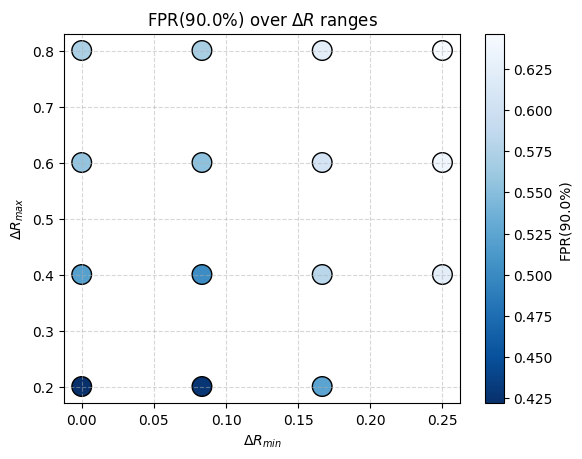

In [ ]:
##################################################################################################################################33
points=5
iterations=1
next_dr_mins=np.linspace(0,0.25,points)
next_dr_maxs=np.linspace(0.20,1.0,points)

min_range=[min(next_dr_mins), max(next_dr_mins)]
max_range=[min(next_dr_maxs), max(next_dr_maxs)]

FPR_effs, dr_mins, dr_maxs= ROC_FPR_2D_plot(MuonTree_Zmumu, MuonTree_ZeroBias, Zmumu_pt, Zmumu_eta, Zmumu_phi, ZeroBias_pt, ZeroBias_eta,
                 ZeroBias_phi, [nmin1,nmax1], [0, len(ZeroBias_pt)], min_range, max_range, points, bins=np.linspace(0,2,1000), scaling=1.0)



In [3]:
FPR_effs_not_none=FPR_effs[FPR_effs != None]

#Get flat position the first 5 indices of the sorted array
flat_indices = np.argsort(FPR_effs_not_none, axis=None)[:5] 
#Arrange them into 2D coordinates
positions = np.unravel_index(flat_indices, FPR_effs.shape) 
#Create list of respective pairs 
best_coords = list(zip(positions[0], positions[1]))
#Print and prepare next iteration
next_dr_mins=[]
next_dr_maxs=[]
print("Top 5 lowest FPR(90%):")
for i, (row, col) in enumerate(best_coords):
    print(fr"{i+1}. ΔR = [{dr_mins[row]}, {dr_maxs[col]}] → FPR = {FPR_effs[row, col]}")
    next_dr_mins.append(dr_mins[row])
    next_dr_maxs.append(dr_maxs[col])

Top 5 lowest FPR(90%):
1. ΔR = [0.0, 0.2] → FPR = 0.42191011235955056
2. ΔR = [0.08333333333333333, 0.2] → FPR = 0.42629757785467126
3. ΔR = [0.08333333333333333, 0.4] → FPR = 0.5018050541516246
4. ΔR = [0.0, 0.4] → FPR = 0.5200772200772201
5. ΔR = [0.16666666666666666, 0.2] → FPR = 0.5232558139534884


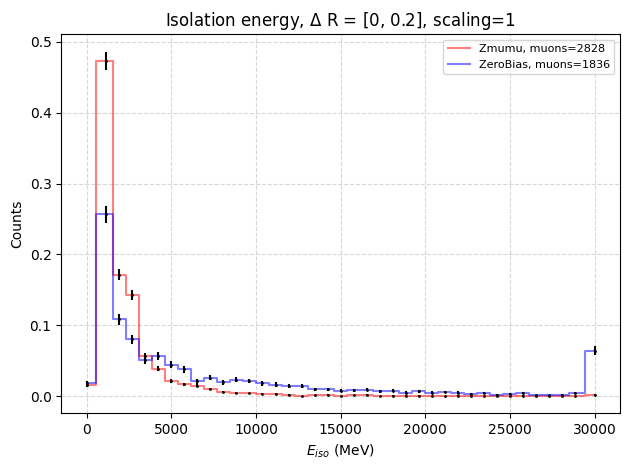

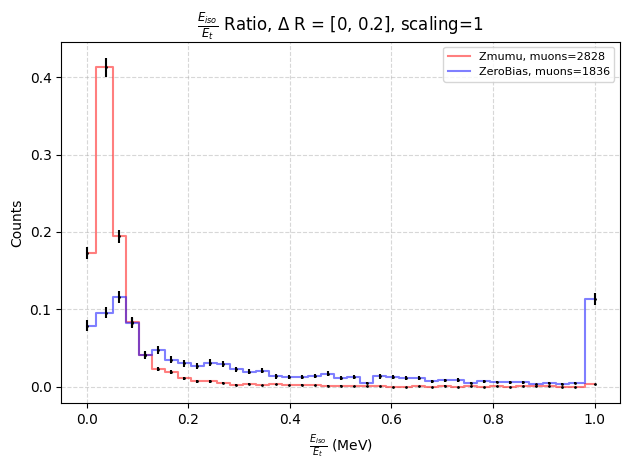

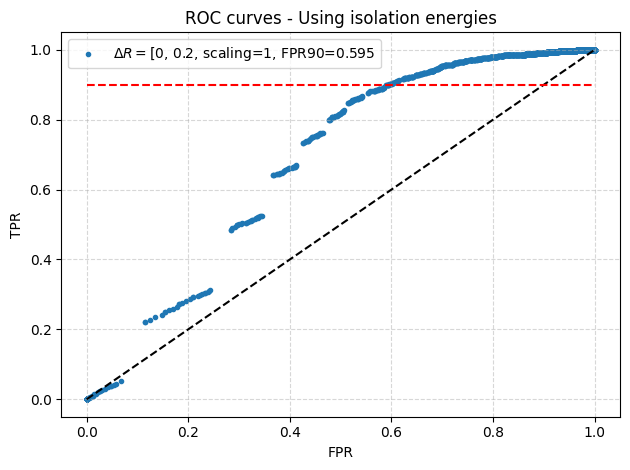

In [6]:

dr_min=0
dr_max=0.2
scalings=1

res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta, Zmumu_phi, dr_min, dr_max,
                            event_range=[nmin1, nmax1], scaling=scalings)
res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi, dr_min, dr_max, 
                        event_range=[0, len(ZeroBias_eta)], scaling=scalings)
#Plot it
bins=np.linspace(0,30*10**3,40)



aux=ak.flatten(res1)
l1=len(aux[~np.isnan(aux)])
aux=ak.flatten(res2)
l2=len(aux[~np.isnan(aux)])

coolplot(
[res1, res2],
bins=bins,
labels=[f"Zmumu, muons={l1}", f"ZeroBias, muons={l2}"],
x_label=r"$E_{iso}$ (MeV)",
y_label="Counts",
title=fr"Isolation energy, $\Delta$ R = [{dr_min}, {dr_max}], scaling={scalings}")

#Compute ratios

ratio1=ak.flatten(res1)/ak.flatten(Zmumu_pt)
ratio1=ratio1[~np.isnan(ratio1)]
l1=len(ratio1)

ratio2=ak.flatten(res2)/ak.flatten(ZeroBias_pt)
ratio2=ratio2[~np.isnan(ratio2)]
l2=len(ratio2)

#Plot them
bins=np.linspace(0,1.0,40)


coolplot(
[ratio1, ratio2],
bins=bins,
labels=[f"Zmumu, muons={l1}", f"ZeroBias, muons={l2}"],
x_label=r"$\frac{E_{iso}}{E_{t}}$ (MeV)",
y_label="Counts",
title=fr"$\frac{{E_{{iso}}}}{{E_{{t}}}}$ Ratio, $\Delta$ R = [{dr_min}, {dr_max}], scaling={scalings}")

#Compute ROC
bins=np.linspace(0,40000,2000)

data1=ak.flatten(res1)
data1=data1[~np.isnan(data1)]
data2=ak.flatten(res2)
data2=data2[~np.isnan(data2)]
Zmumu_counts, _ = np.histogram(data1, bins)
ZeroBias_counts, _ = np.histogram(data2, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

#Plot ROC
FPR90=min(FPR[TPR >= 0.9])
plt.scatter(FPR, TPR, marker='.', label=fr'$\Delta R=$[{dr_min}, {dr_max}, scaling={scalings}, FPR90={np.round(FPR90,3)}')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.plot([0,1],[0.9,0.9],color='r', linestyle='--')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title(rf"ROC curves - Using isolation energies")
plt.tight_layout()

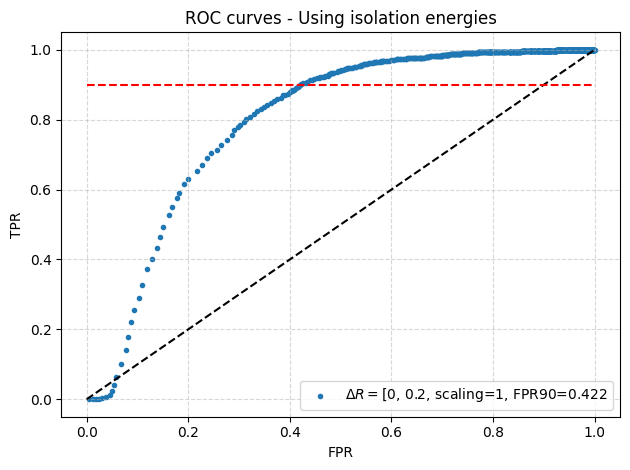

In [8]:
bins=np.linspace(0,2,1000)
Zmumu_counts, _ = np.histogram(ratio1, bins)
ZeroBias_counts, _ = np.histogram(ratio2, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

#Plot ROC
FPR90=min(FPR[TPR >= 0.9])
plt.scatter(FPR, TPR, marker='.', label=fr'$\Delta R=$[{dr_min}, {dr_max}, scaling={scalings}, FPR90={np.round(FPR90,3)}')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.plot([0,1],[0.9,0.9],color='r', linestyle='--')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title(rf"ROC curves - Using isolation energies")
plt.tight_layout()